In [1]:
from scapy.all import *
import pandas as pd
import matplotlib.pyplot as plt

### Inciso 1

In [2]:
captured_packets = sniff(count=10)

### Inciso 2

In [43]:
# open a PCAP file
pcap_packets = rdpcap('analisis_paquetes.pcap')

### Inciso 3

In [44]:
packets = captured_packets + pcap_packets  

In [45]:
def extract_needed_info(packets):
    packet_info = []

    for pkt in packets:
        info = {}

        info['src address'] = pkt[IP].src
        info['dst address'] = pkt[IP].dst
        if pkt.haslayer(TCP):
            info['src port'] = pkt[TCP].sport
            info['dst port'] = pkt[TCP].dport
            info['payload len'] = len(pkt[TCP].payload)
        elif pkt.haslayer(UDP):
            info['src port'] = pkt[UDP].sport
            info['dst port'] = pkt[UDP].dport
            info['payload len'] = len(pkt[UDP].payload)

        packet_info.append(info)

    return packet_info

In [46]:
df = pd.DataFrame(extract_needed_info(packets))
df.head()

,src address,dst address,src port,dst port,payload len
0,192.168.39.127,206.247.56.5,55755,8801,27
1,206.247.56.5,192.168.39.127,8801,55754,82
2,206.247.56.5,192.168.39.127,8801,55754,251
3,206.247.56.5,192.168.39.127,8801,55754,81
4,206.247.56.5,192.168.39.127,8801,55754,268


### Inciso 5

In [47]:
most_frequent_src_address = df["src address"].value_counts().idxmax()
print("Src address mas utilizada:", most_frequent_src_address)

Src address mas utilizada: 10.1.10.53


In [48]:
most_frequent_dst_address = df["dst address"].value_counts().idxmax()
print("Dst address más utilizada:", most_frequent_dst_address)

Dst address más utilizada: 10.1.10.53


In [49]:
filtered_df = df[df["src address"] == most_frequent_src_address]

print("IPs a las que se comunica: ", filtered_df["dst address"].unique())
print("Puertos destinos a las que se comunica: ", filtered_df["dst port"].unique())

IPs a las que se comunica:  ['84.54.22.33' '75.75.75.75']
Puertos destinos a las que se comunica:  [53]


In [50]:
filtered_df = df[df["dst address"] == most_frequent_src_address]

print("Puertos origen a las que se comunica: ", filtered_df["src port"].unique())

Puertos origen a las que se comunica:  [53]


#### Indique el propósito de los puertos que más aparece en los incisos d y e
El DNS (encargado de cambiar el nombre de los dominios a uno legible) hace uso del puerto 53 tanto en UDP como en TCP. El DNS retorna la dirección IP correspondiente y se establece la conexión cliente-servidor.

### Inciso 6

Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads
enviados de dichas direcciones

Text(0, 0.5, 'IPs origen')

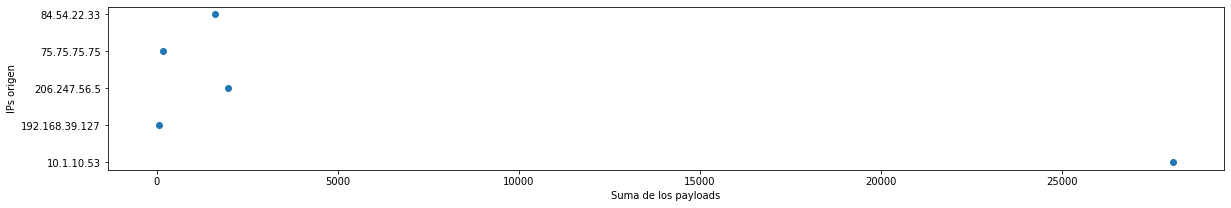

In [51]:
plt.rcParams["figure.figsize"] = (20,3)

grouped = df.groupby(['src address']).sum()

plt.scatter(grouped['payload len'], grouped.index)
plt.xlabel('Suma de los payloads')
plt.ylabel('IPs origen')

Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads
recibidos en dichas direcciones.

Text(0, 0.5, 'IPs destino')

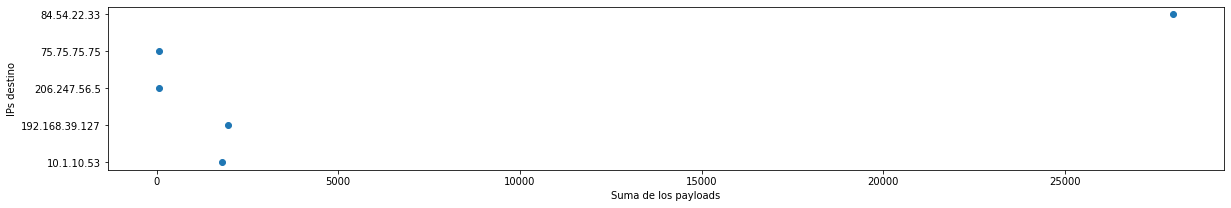

In [52]:
grouped = df.groupby(['dst address']).sum()

plt.scatter(grouped['payload len'], grouped.index)
plt.xlabel('Suma de los payloads')
plt.ylabel('IPs destino')

Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los
payloads enviados de dichos puertos.

Text(0, 0.5, 'Puerto origen')

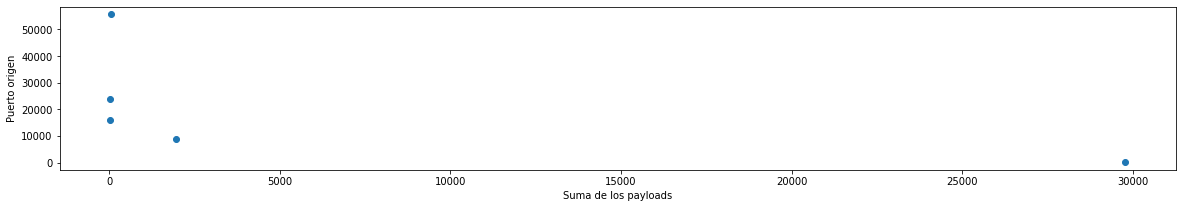

In [53]:
grouped = df.groupby('src port').sum()

plt.scatter(grouped['payload len'], grouped.index)
plt.xlabel('Suma de los payloads')
plt.ylabel('Puerto origen')

Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los payloads recibidos en dichos puertos.

Text(0, 0.5, 'Puertos destino')

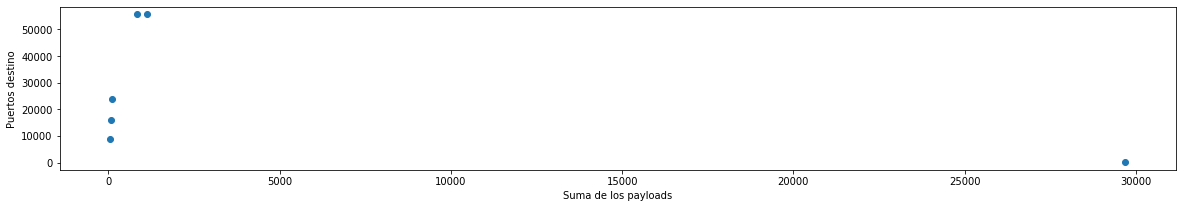

In [54]:
grouped = df.groupby('dst port').sum()

plt.scatter(grouped['payload len'], grouped.index)
plt.xlabel('Suma de los payloads')
plt.ylabel('Puertos destino')

### Inciso 7

In [55]:
filtered_df = df[df["src address"] == most_frequent_src_address]
len(filtered_df)

31

In [56]:
payload_filter = filtered_df['payload len'].unique()
max(payload_filter)

1023

In [57]:
filtered_df[filtered_df["payload len"] == max(payload_filter)]

,src address,dst address,src port,dst port,payload len
30,10.1.10.53,84.54.22.33,53,53,1023


In [85]:
array_max_payload = None


for pkt in pcap_packets:
        if pkt.haslayer(TCP):
            if  array_max_payload == None and len(pkt[TCP].payload) == max(payload_filter):
                array_max_payload = pkt[Raw].load
        elif pkt.haslayer(UDP):
            if array_max_payload == None and len(pkt[UDP].payload) == max(payload_filter):
                array_max_payload = pkt[Raw].load

### Max payload

In [88]:
array_max_payload

b'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd<>}\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd%\xef\xbf\xbd\xef\xbf\xbdR\xef\xbf\xbdA\x08\xef\xbf\xbd\xef\xbf\xbdt\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\\\x07@c\xef\xbf\xbd-\xef\xbf\xbdG\xef\xbf\xbd9\xef\xbf\xbdu9\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdE%wq\xef\xbf\xbd\xef\xbf\xbd\x0f\x0e\xef\xbf\xbd\xef\xbf\xbdo\xef\xbf\xbd\xef\xbf\xbdc\xef\xbf\xbd.\xef\xbf\xbd8\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdg\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\n!\xef\xbf\xbd\xef\xbf\xbd.\xef\xbf\xbd|\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x04\xef\xbf\xbdp\xef\xbf\xbd&:\xef\xbf\xbdb=\x16\x0f\x14c\xef\xbf\xbd\xef\xbf\xbdd\xef\xbf\xbd<\xef\xbf\xbd\xef\xbf\xbdW\xef\xbf\xbd\x08\x1b\xe5\x96\x8eM\x1e\xef\xbf\xbd\xef\xbf\xbdR\xde\x97\xef\xbf\xbd\xef\xbf\xbd\\2\xe9\xa0\x8bB\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd^"+#m>r\x0cR\x16\x08)\x1f(,\xef\xbf\xbd\xef\xbf\xbd\x1d9\x07\xef\xbf\xbds\x1f\xef\xbf\xbd\r\xef\xbf\xbd\xef\xbf\xbdR\xef\xbf\xbd\'\x18~\xef\xbf\xbd\xef\xbf\xbd\x07\xef\x

In [89]:
array_max_payload.decode('utf-8')

'���<>}���%��R�A\x08��t���\\\x07@c�-�G�9�u9���E%wq��\x0f\x0e��o��c�.�8���g���\n!��.�|���\x04�p�&:�b=\x16\x0f\x14c��d�<��W�\x08\x1b喎M\x1e��Rޗ��\\2頋B�����^"+#m>r\x0cR\x16\x08)\x1f(,��\x1d9\x07�s\x1f�\r��R�\'\x18~��\x07��^(:�ѥ�Q�\x19�v:"��g���tX"�YZG����pǤ�\x0br�+�F��j\x05\u2e7dg��\x1cO1��%݇ލ��"LI��$�\x07�%�.b]3!�E�k*\x1d\x06�=\x04�@@�\x14��}�5�`�����)��ɜd\x11��\x14=ի\x162�cȰ�\x07g\x15���K&\x11�b��\x02����<@3\x11�TD;��%u�L�.,.}�K��\\}��m1��Ej��\x15�]�������\r͡�L�:ߴ�b��;��1�v�\x10�VR��"kq���\x03�ǧ7\x03���5�0)����\x1a~��\x1f\x0f7ľ3v���C�\x1c}j�&�B�y�/\x00BA\x7f��$���\x10XjSI����S�\\t�{�P�i\x02�焀�B����ϱ�\x1eQ�~�q���\x03\x07�kƱ��K/�4�)R*\x15�c�������U��҇\x08�"��\x14�\x18���~\x16��C3�'

### ¿Encuentra algún dato que no haga sentido que se envié a través del puerto explicado en el inciso f?
No se están mandando solo bytes sino además caracteres como lo es <>}